# Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor


SyntaxError: invalid syntax (3399947372.py, line 13)

# Loading the dataset

In [33]:
os.chdir("C:\\Users\\Emmanuel\\Downloads\\Stroke_dataset")

In [34]:
stroke_data= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [35]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [37]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Checking unique values

In [38]:
stroke_data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# Handling null values

In [39]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [40]:
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace = True)

In [41]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exporing the Data

In [42]:
heart_type_count=stroke_data['heart_disease'].value_counts()
print(heart_type_count)

0    4834
1     276
Name: heart_disease, dtype: int64


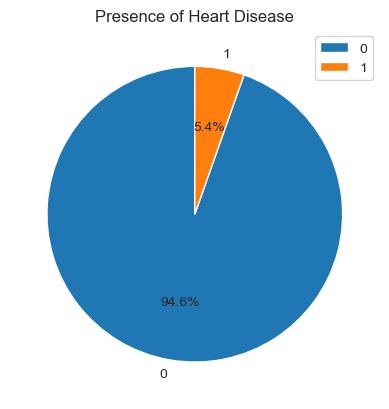

In [43]:
labels = heart_type_count.index.tolist()
sizes = heart_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Presence of Heart Disease')
plt.legend(labels, loc='best')

plt.show()

In [44]:
gender_type_count =stroke_data['gender'].value_counts()
print(gender_type_count)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


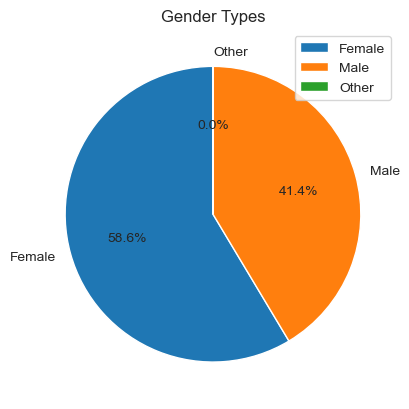

In [45]:
labels = gender_type_count.index.tolist()
sizes = gender_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Gender Types')
plt.legend(labels, loc='best')

plt.show()

In [46]:
work_type_count =stroke_data['work_type'].value_counts()
print(work_type_count)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


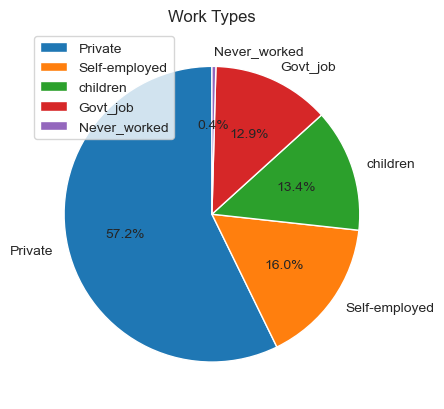

In [47]:
labels = work_type_count.index.tolist()
sizes = work_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Work Types')
plt.legend(labels, loc='best')

plt.show()

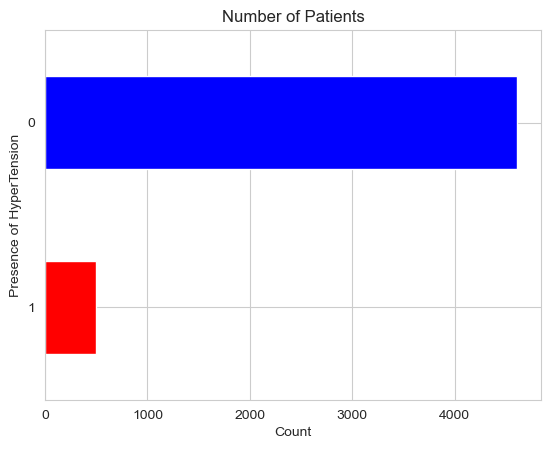

In [48]:
hypertension_counts = stroke_data['hypertension'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'blue']

# Create horizontal bar chart of airline counts
hypertension_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Presence of HyperTension")
plt.show()

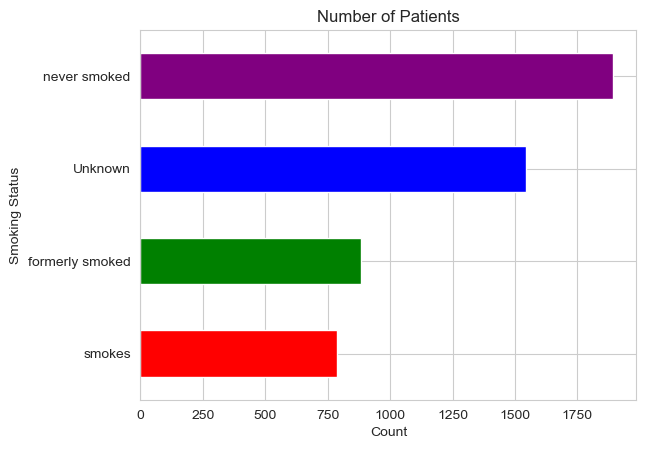

In [49]:
smoking_counts = stroke_data['smoking_status'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'green', 'blue', 'purple']

# Create horizontal bar chart of airline counts
smoking_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Smoking Status")
plt.show()

Text(0.5, 1.0, 'Histogram of average glucose level')

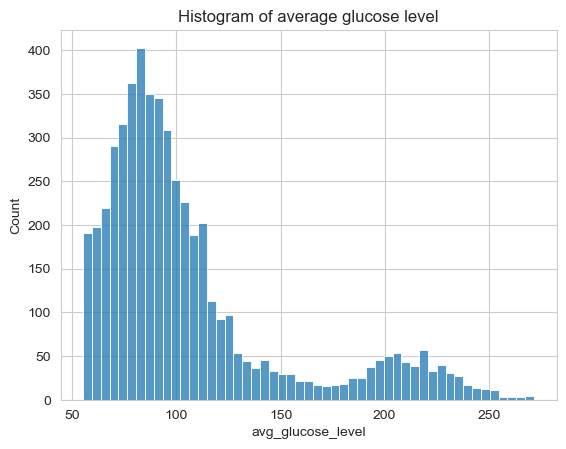

In [50]:
sns.histplot(stroke_data['avg_glucose_level'])
plt.title("Histogram of average glucose level")

Text(0.5, 1.0, 'Histogram of average glucose level by Smokers status ')

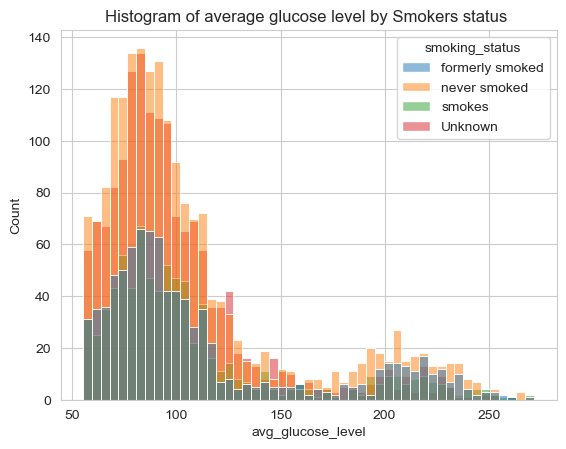

In [51]:
# Histograms for each smokers
sns.histplot(data=stroke_data, x='avg_glucose_level', hue='smoking_status')

# Add title
plt.title("Histogram of average glucose level by Smokers status ")


Text(0.5, 1.0, 'Histogram of hypertension by Smokers status ')

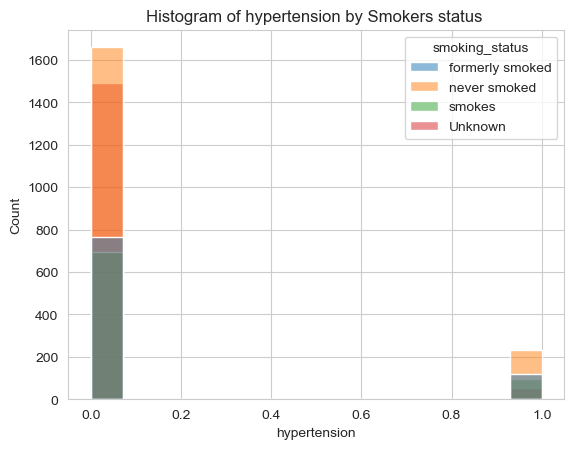

In [52]:
# Histograms for each smokers
sns.histplot(data=stroke_data, x='hypertension', hue='smoking_status')

# Add title
plt.title("Histogram of hypertension by Smokers status ")


Text(0.5, 1.0, 'Histogram of heart_disease by Smokers status ')

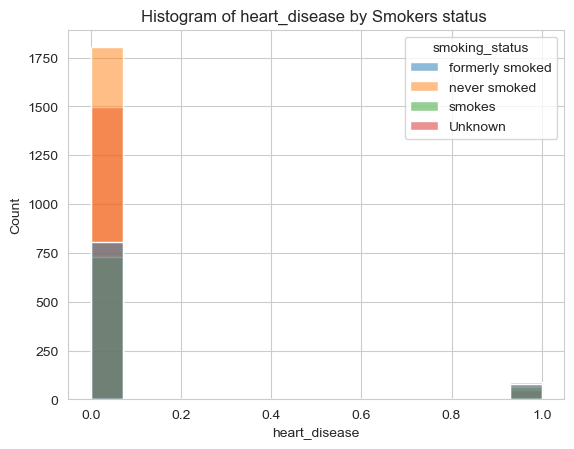

In [53]:
# Histograms for each smoking status
sns.histplot(data=stroke_data, x='heart_disease', hue='smoking_status')

# Add title
plt.title("Histogram of heart_disease by Smokers status ")


How does age relate to stroke?

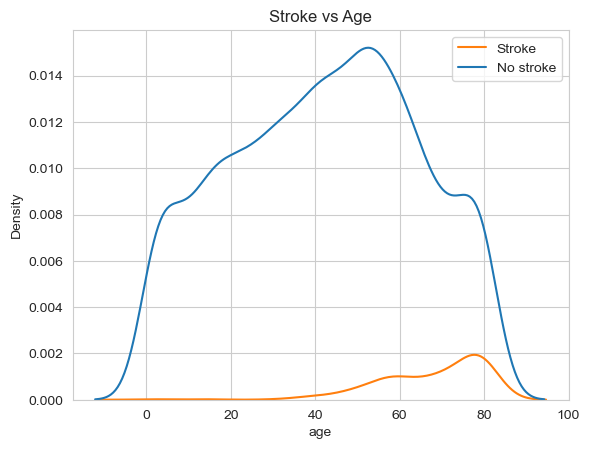

In [54]:
sns.kdeplot(data=stroke_data, x='age', hue='stroke')
plt.title('Stroke vs Age')
plt.legend(['Stroke', 'No stroke'])

Correlation in the dataset


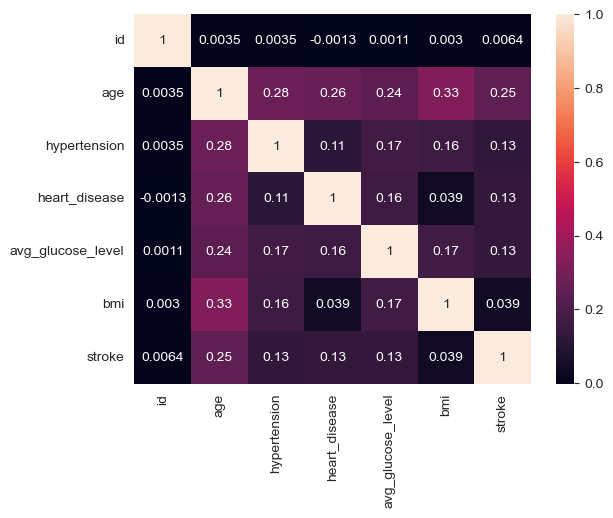

<Figure size 2000x1600 with 0 Axes>

In [55]:
sns.heatmap(stroke_data.corr(), fmt='.2g', annot=True)
plt.figure(figsize=(20,16))
plt.show()

How does BMI relate to stroke?

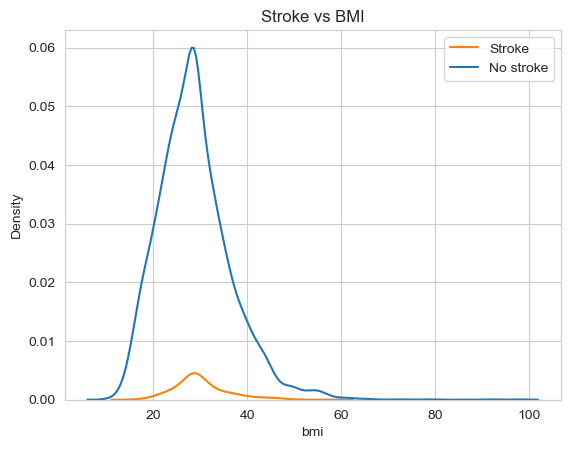

In [56]:
sns.kdeplot(data=stroke_data, x='bmi', hue='stroke')
plt.title('Stroke vs BMI')
plt.legend(['Stroke', 'No stroke'])

Age

<AxesSubplot:xlabel='age'>

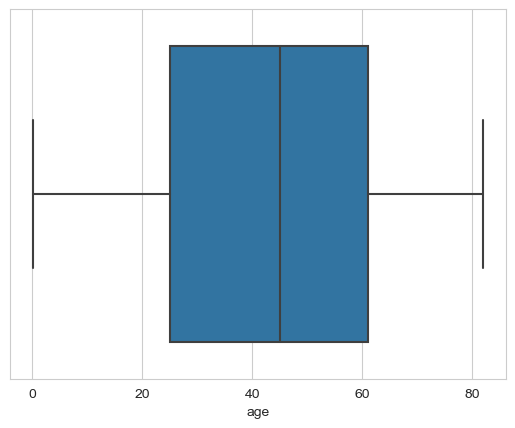

In [57]:
sns.boxplot(x=stroke_data['age'])


Ever Married

<AxesSubplot:xlabel='ever_married', ylabel='count'>

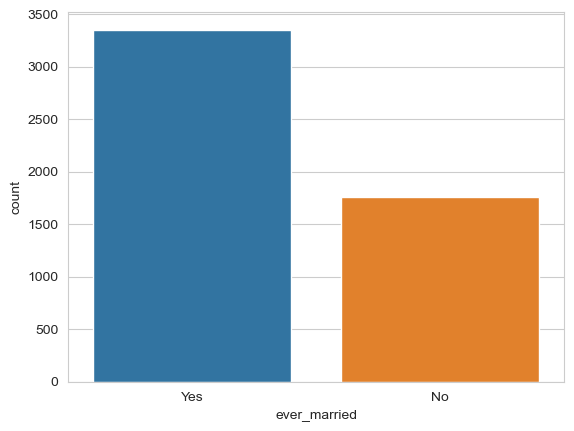

In [58]:
sns.countplot(x=stroke_data['ever_married'])

How does average glucose level relate to stroke?

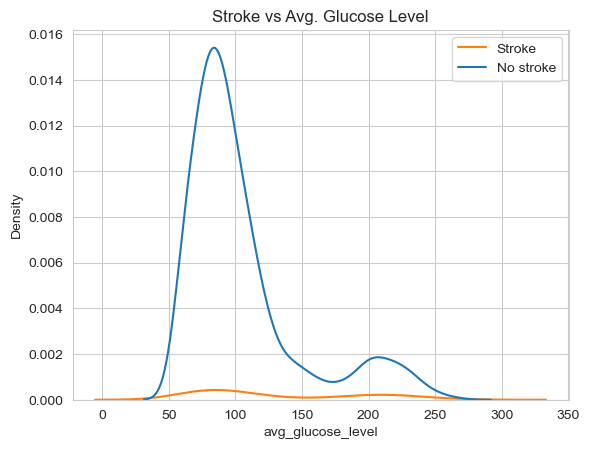

In [59]:
sns.kdeplot(data=stroke_data, x='avg_glucose_level', hue='stroke')
plt.title('Stroke vs Avg. Glucose Level')
plt.legend(['Stroke', 'No stroke'])

# Preprocessing

Encoding

In [60]:
# IDENTIFYING CATEGORICAL VARIABLES IN THE DATASET

cat_cols = list(stroke_data.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 5
Categorical columns:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [62]:
import category_encoders as ce

In [63]:
# PERFORMING TARGET ENCODING FOR ALL CATERGOTICAL VARIABLES

te = ce.TargetEncoder(cols=cat_cols)
stroke_data = te.fit_transform(stroke_data, stroke_data['stroke'])

In [64]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.051064,67.0,0,1,0.065613,0.050940,0.052003,228.69,36.600000,0.079096,1
1,51676,0.047094,61.0,0,0,0.065613,0.079365,0.045346,202.21,28.893237,0.047569,1
2,31112,0.051064,80.0,0,1,0.065613,0.050940,0.045346,105.92,32.500000,0.047569,1
3,60182,0.047094,49.0,0,0,0.065613,0.050940,0.052003,171.23,34.400000,0.053232,1
4,1665,0.047094,79.0,1,0,0.065613,0.079365,0.045346,174.12,24.000000,0.047569,1


In [65]:
# IDENTIFYING NUMERICAL COLUMNS

numeric_cols = stroke_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


# Creating a Model Using Random Forest and Decision Tree Algorithm

In [67]:
# SETTING TARGET VARIABLES
y = stroke_data.stroke
stroke_features = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# SETTING FEATURE VARIABLE
X = stroke_data[stroke_features]

Using a random Forest algorithm

In [75]:
#Using a random tree algorithm
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
stroke_model = RandomForestRegressor(random_state=1)
# Fit model
stroke_model.fit(train_X, train_y)

# get predicted streams on validation data
val_predictions = stroke_model.predict(val_X)
print("Predictions for the following 5 patients:")
print(X.head())
print("Stroke predictions for 5 patients are:")
print(stroke_model.predict((val_X).head()))
print("Mean Absolute Error:",mean_absolute_error(val_y, val_predictions))

    


Predictions for the following 5 patients:
      id    gender   age  hypertension  heart_disease  ever_married  \
0   9046  0.051064  67.0             0              1      0.065613   
1  51676  0.047094  61.0             0              0      0.065613   
2  31112  0.051064  80.0             0              1      0.065613   
3  60182  0.047094  49.0             0              0      0.065613   
4   1665  0.047094  79.0             1              0      0.065613   

   work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0   0.050940        0.052003             228.69  36.600000        0.079096   
1   0.079365        0.045346             202.21  28.893237        0.047569   
2   0.050940        0.045346             105.92  32.500000        0.047569   
3   0.050940        0.052003             171.23  34.400000        0.053232   
4   0.079365        0.045346             174.12  24.000000        0.047569   

   stroke    gender  ever_married  work_type  Residence_type  

Using a decision tree algorithm

In [74]:
# Using a decision tree algorithm
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
strok_model = DecisionTreeRegressor()
# Fit model
strok_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = strok_model.predict(val_X)
print("Predictions for the following 5 patients:")
print(X.head())
print("Stroke predictions for 5 patients are:")
print(strok_model.predict((val_X).head()))
print("Mean Absolute Error:",mean_absolute_error(val_y, val_predictions))

Predictions for the following 5 patients:
      id    gender   age  hypertension  heart_disease  ever_married  \
0   9046  0.051064  67.0             0              1      0.065613   
1  51676  0.047094  61.0             0              0      0.065613   
2  31112  0.051064  80.0             0              1      0.065613   
3  60182  0.047094  49.0             0              0      0.065613   
4   1665  0.047094  79.0             1              0      0.065613   

   work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0   0.050940        0.052003             228.69  36.600000        0.079096   
1   0.079365        0.045346             202.21  28.893237        0.047569   
2   0.050940        0.045346             105.92  32.500000        0.047569   
3   0.050940        0.052003             171.23  34.400000        0.053232   
4   0.079365        0.045346             174.12  24.000000        0.047569   

   stroke    gender  ever_married  work_type  Residence_type  